# INTERNSAY Internship

## Name: Mohammad Wasiq

## Email: mohammadwasiq0786@gmail,com

## LinkedIn: https://www.linkedin.com/in/mohammadwasiq0/

## GitHub:https://github.com/mohammadwasiq0/

# ICC CRICKET WORLD CUP 2019

<center><h1>ICC CRICKET WORLD CUP 2019 </h1>
Venue : ENGLAND<br>
Total Teams : 10
</center>


![](https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2019/05/17/Pictures/event-2019-during-cricket-world-trophy-trophy_56f6ff7c-787d-11e9-9ebe-bd8a57c16f3e.jpg)

The Dataset consists of Matches that are played after 2012. I am analyzing those matches which are played after 2012 and played at England.

<center><h2>What am I going to do in this kernel?</h2></center>

**Regarding Pitches**
1. Gather the Data of World Cup Venues.
2. Store and Analyze the Data of Venues.
3. How many mathces are played in those venues after 2012?
4. Out of those, How many does each Team won?
5. What's the winning Percentage of WC Teams?
6. Does Batting First or Second matters in these pitches? 
7. What's the average Score necessary to win matches in these Venues?
8. Which Team gets benifit of these Pitches?
9. What are average number of wickets taken per innigs in these Pitches?
10. What are highest Run Scoring Pitches?

**Regarding Batsmen**
1. Who are the Best Batsmen to be watched this WC?
2. How many Batsmen have an Average above 40?
3. Who has the Best Batting Average?
4. Who are the top 5 Best Batsman based on Average?
5. Who has the Best Strike Rate?
6. Who are the top 5 Best Batsman based on Strike Rate?
7. Who scored most number of Boundaries?
8. Which Team has most number of Best Batsman?

**Regarding Bowlers**
1. Who are the Best Bowlers to be watched this WC?
2. How many Bowlers have an Average less than 40?
3. Who has the Best Bowling Average?
4. Who are the top 5 Best Bowlers based on Average?
5. Who has the Best Strike Rate?
6. Who are the top 5 Best Bowlers based on Strike Rate?
7. Who has the best Economy?
8. Which Team has most number of Best Bowlers?

In [1]:
# load require libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

['Batsman_Data.csv', 'Ground_Averages.csv', 'ODI_Match_Totals.csv', 'ODI_Match_Results.csv', 'WC_players.csv', 'Bowler_data.csv']


Let's read and store all the csv files.

In [2]:
Batsman_Data = pd.read_csv('Batsman_Data.csv')
Ground_Data = pd.read_csv('Ground_Averages.csv')
ODI_Scores_Data = pd.read_csv('ODI_Match_Totals.csv')
ODI_Results_Data = pd.read_csv('ODI_Match_Results.csv')
WC_Players_Data = pd.read_csv('WC_players.csv')
Bowler_Data = pd.read_csv('Bowler_data.csv')

VENUES - GROUNDS LIST

1. The Oval, London
2. Trent Bridge, Nottingham
3. Sophia Gardens, Cardiff
4. County Ground, Bristol
5. Rose Bowl, Southampton
6. County Ground, Taunton
7. Old Trafford, Manchester
8. Edgbaston, Birmingham
9. Headingley, Leeds
10. Lord's, London
11. Riverside Ground, Chester-le-Street


<center>
    Since the WC is in England, I would like to analyze and find insights of all matches that occured in England.
    </center>

In [3]:
Ground_Data.sample(6)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
55,Dubai International Cricket Stadium - U.A.E.,2013-2019,24,22,1,1,10333,352,12910,29.35,4.80
44,"Darren Sammy National Cricket Stadium, Gros Is...",2013-2019,7,5,1,1,2255,84,2944,26.84,4.59
64,Queenstown Events Centre - New Zealand,2014-2014,1,1,0,0,407,9,252,45.22,9.69
59,Rangiri Dambulla International Stadium - Sri L...,2013-2018,12,10,0,2,4633,152,5098,30.48,5.45
81,"Buffalo Park, East London - South Africa",2015-2017,2,2,0,0,784,27,894,29.03,5.26
39,"Edgbaston, Birmingham - England",2013-2017,15,12,0,3,5950,182,6654,32.69,5.36


In [4]:
ODI_Results_Data.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [5]:
ODI_Scores_Data.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


From the above two csv files, we can understand that **ODI_Scores_Data** gives much information compared to other file. So I would like to proceed with ODI_Scores_Data.

In [6]:
ODI_Scores_Data["Scores_ID"] = ODI_Scores_Data["Unnamed: 0"]
ODI_Scores_Data.drop(columns="Unnamed: 0",inplace=True)

Since we are focusing in England, Let's analyze the England pitches and conditions and results over their grounds.

In [7]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [8]:

#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = ODI_Scores_Data.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            #print("i ; ",i,"--j : ",j)
            WC_Ground_Stats.append((i,j))
            

In [9]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'Manchester': 'Old Trafford, Manchester',
 'Leeds': 'Headingley, Leeds',
 'Birmingham': 'Edgbaston, Birmingham',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Southampton': 'Rose Bowl, Southampton',
 'Bristol': 'County Ground, Bristol',
 'The Oval': 'The Oval, London',
 'Cardiff': 'Sophia Gardens, Cardiff',
 'Nottingham': 'Trent Bridge, Nottingham',
 "Lord's": "Lord's, London"}

Seems like there's no Data regardign ODI Matches in this Taunton Ground. So we can't analyze the stats of **6. County Ground, Taunton** .

In [10]:
#Let's gather the data of all ODI's in these WC Venues
WC_Grounds_History = ODI_Scores_Data[ODI_Scores_Data.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
74,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,557
75,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,844
76,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,558
77,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,845
78,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,559


So, now we have the data of matches that were played in WC venues. Now let's analyze the following things,
1. How many WC teams have played in these venues before and what are they?
2. Which Team has more Win Percentage in these Venues?
3. Does Batting First helps winning in these Pitches?
4. What should the captain opt for, when he wins the Toss?


**How many WC teams have played in these venues before and what are they?****



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

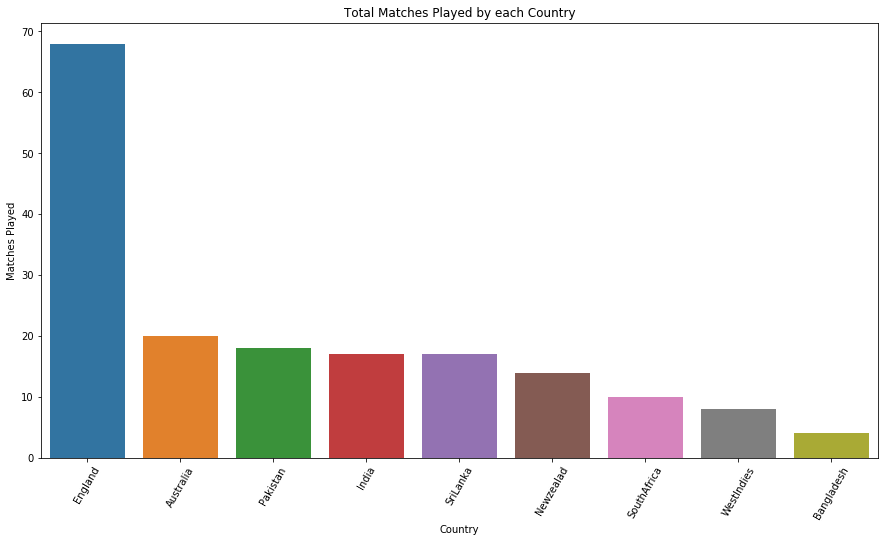

In [11]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

1. So, England has the benifit of Home conditions and even playing many matches over there, they will get used to those pitches and can understand the conditions of pitches very well. 
2. After England, it's Aussies which played many mathces in those conditions.

**Team wise Winning Percentage in England Pitches**

In [12]:
WC_Grounds_History.sample(5)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
1088,239,37.0,6.45,482.0,2,lost,v England,"Trent Bridge, Nottingham",19 Jun 2018,ODI # 4011,Australia,2,1188
925,265/1,40.1,6.59,265.0,2,won,v Bangladesh,"Edgbaston, Birmingham",15 Jun 2017,ODI # 3891,India,6,780
80,305,50.0,6.10,332.0,2,lost,v India,"Sophia Gardens, Cardiff",6 Jun 2013,ODI # 3363,SouthAfrica,3,286
889,328/5,50.0,6.56,331.0,2,lost,v England,"Rose Bowl, Southampton",27 May 2017,ODI # 3873,SouthAfrica,3,377
562,192/7,25.0,7.68,192.0,2,won,v New Zealand,"Riverside Ground, Chester-le-Street",20 Jun 2015,ODI # 3659,England,1,898


In [13]:
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

seems like some data is missed, So I will remove Data with Result "-"

In [14]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [15]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

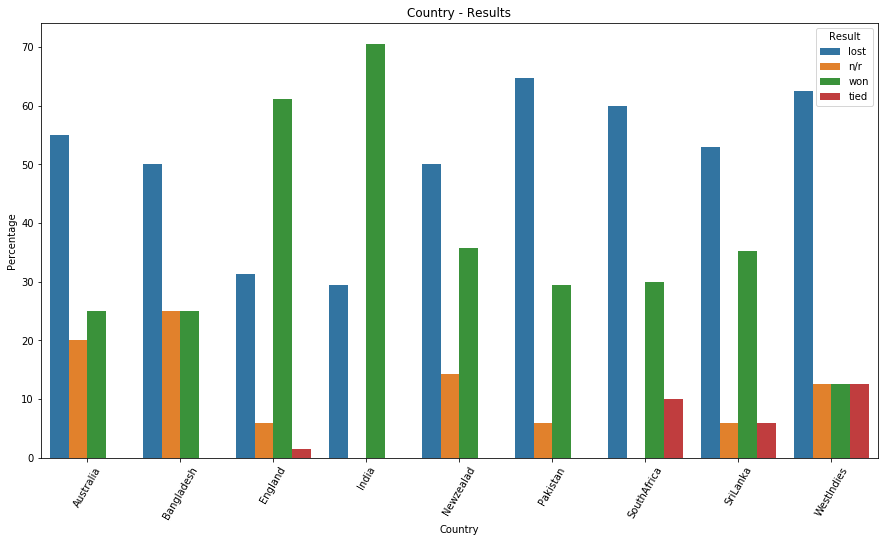

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

From the above figure, we can understand that,
1. India and England have the highest winning percentage compared to that of other Nations
2. Pakistan, South Africa, West Indies have the Highest Losing Percentage.

Let's see what happens when the Top Two Teams face?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'England')

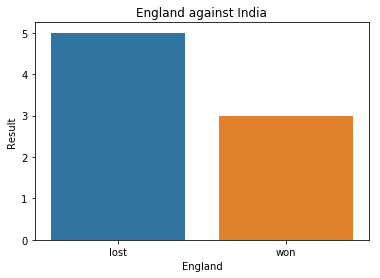

In [17]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

**Let's analyze the Win and Lose Percentage based on Innings wrt Stadium**

In [18]:
WC_Grounds_History.sample(5)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
600,300/8,50.0,6.00,NaN,1,won,v Australia,"Old Trafford, Manchester",8 Sep 2015,ODI # 3682,England,1,901
965,369/9,50.0,7.38,NaN,1,won,v West Indies,"County Ground, Bristol",24 Sep 2017,ODI # 3915,England,1,943
155,315/7,50.0,6.30,NaN,1,won,v England,"Old Trafford, Manchester",8 Sep 2013,ODI # 3412,Australia,2,1090
84,269/6,50.0,5.38,NaN,1,won,v Australia,"Edgbaston, Birmingham",8 Jun 2013,ODI # 3365,England,1,847
562,192/7,25.0,7.68,192.0,2,won,v New Zealand,"Riverside Ground, Chester-le-Street",20 Jun 2015,ODI # 3659,England,1,898


Text(0, 0.5, 'Winning Percentage')

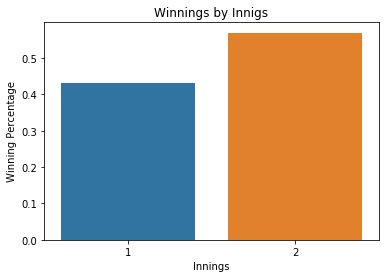

In [19]:
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innigs")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

So, from the above figure, we can understand that,
1. Those Teams which Bowl First has won around 55% of the matches.

Let's Divide them by Pitches and see the history

In [20]:
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

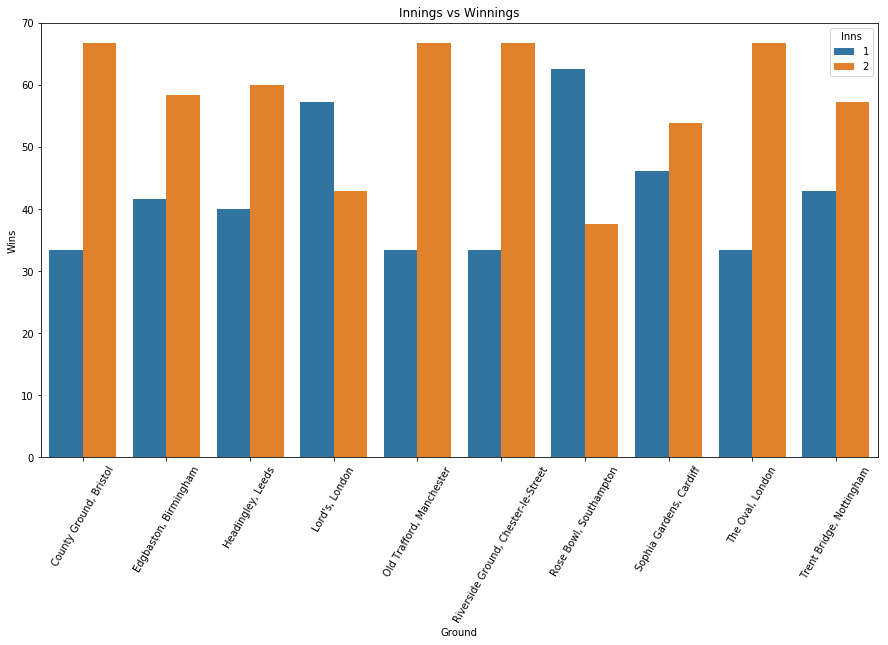

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

As we can see, 
1. Teams that Bat second will Win most of the times.

Now Let's analyze the Scores.
1. If a Team Bats First, How much should it score to win majority of times?
2. If a Team Bowls First, How much should the Bowling Team restrict the Runs?

In [22]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Score.str.contains("D")]

Text(0, 0.5, 'Scores')

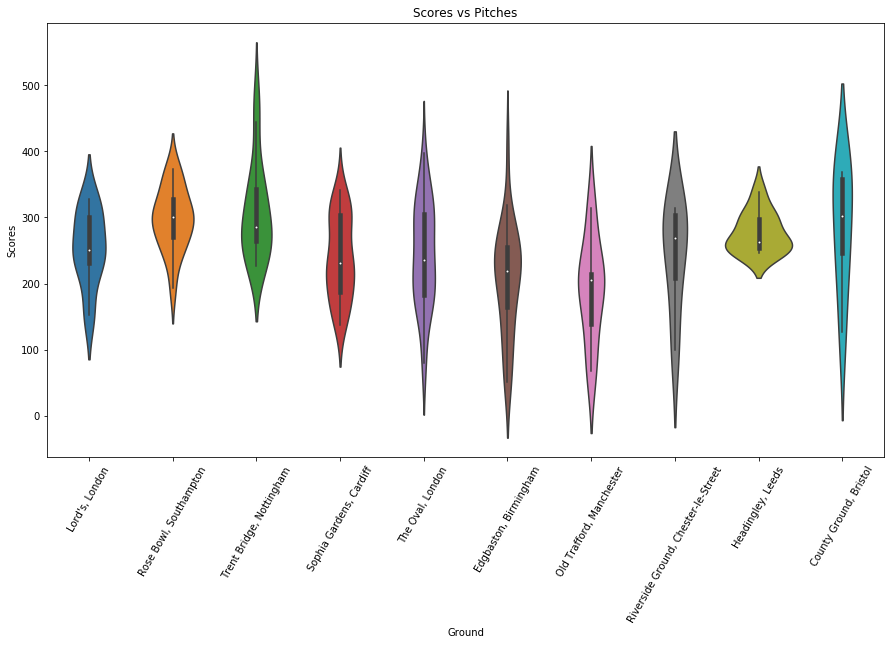

In [23]:
Scores = [int(item[0]) for item in WC_Grounds_History.Score.str.split("/")]
WC_Grounds_History["Score_without_wickets"] = Scores
Stadium_Scores = WC_Grounds_History[["Score_without_wickets","Ground"]]
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
plt.figure(figsize=(15,8))
#sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.xticks(rotation = 60)
sns.violinplot(x = "Ground", y = "Score_without_wickets",data = Stadium_Scores).set_title("Scores vs Pitches")
plt.ylabel("Scores")

As we can see,
1. Trent Bridge, Nottingham, County Ground, Bristol and Headingley, Leeds are good scoring Pitches

Text(0, 0.5, 'Scores')

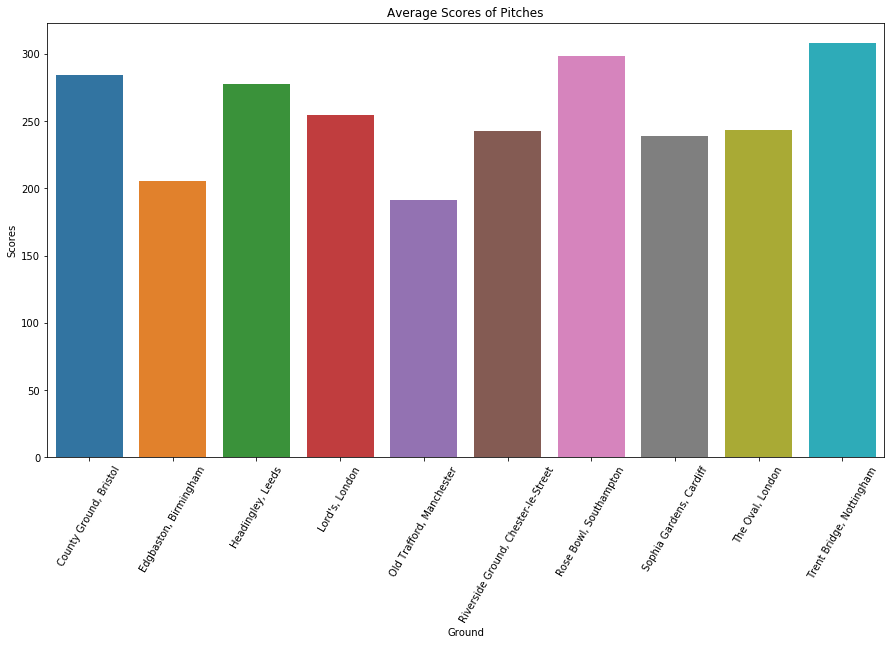

In [24]:
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
Stadium_Scores = Stadium_Scores.groupby("Ground").mean().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Score_without_wickets", data = Stadium_Scores).set_title("Average Scores of Pitches")
plt.xticks(rotation = 60)
plt.ylabel("Scores")

So, We can understand that,
1. Trent Bridge, Nottingham, has an average score around 300. It shows that, Teams which play here can benifit much by scoring runs. If the team takes quick wickets and win by huge margin, then run rate will be more which can help in getting into semis.

**Analyzing No.of Wickets in these Pitches**

In [25]:
def no_of_wickets(value):
    if "/" not in value:
        return 10
    elif "D" in value:
        return 0
    else:
        return int(value.split("/")[1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

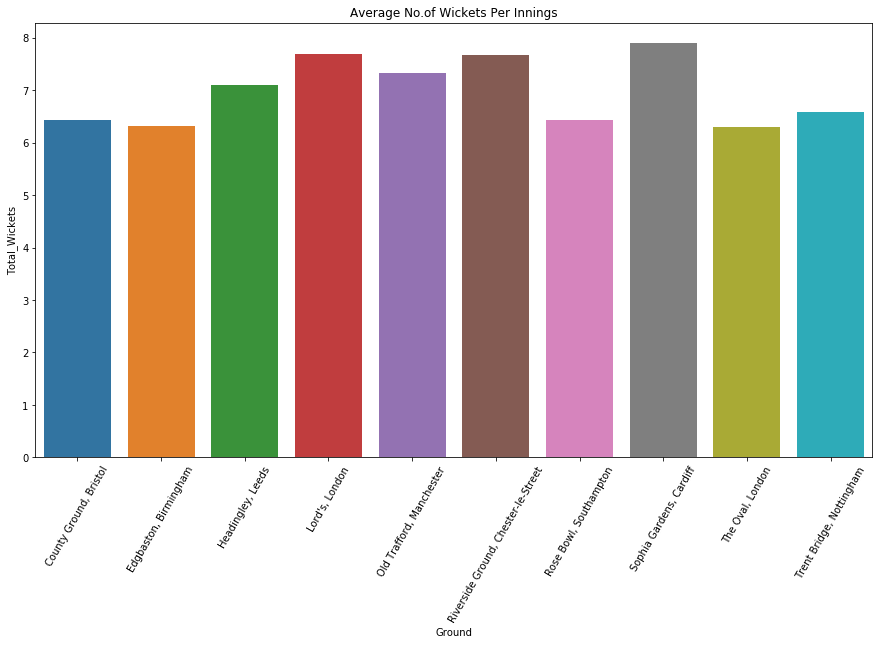

In [26]:
WC_Grounds_History["Total_Wickets"] = WC_Grounds_History.Score.apply(no_of_wickets)

Stadium_Wickets = WC_Grounds_History[["Total_Wickets","Ground"]]
Stadium_Wickets = Stadium_Wickets.groupby("Ground").mean().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Total_Wickets", data = Stadium_Wickets).set_title("Average No.of Wickets Per Innings")
plt.xticks(rotation = 60)

As we see, 
1. Minimum no.of Wickets for any innings is usually 6-7

Creating a Dictionary consisting of Each Team Data wrt every Stadium in format:,

{"Lord's, London": {'Newzealad': {'matches_played': 1,
   'matches_won': 1,
   'winning_percentage': 100.0},
  'England': {'matches_played': 7,
   'matches_won': 3,
   'winning_percentage': 42.857142857142854},............


In [27]:
Grounds = WC_Grounds_History.Ground.unique()
WC_Teams = WC_Grounds_History.Country.unique()
Ground_Winnings = {}
for Ground in Grounds:
    Ground_Winnings.update({Ground : {}})
    for Team in WC_Teams:
        Country_Ground_Record = WC_Grounds_History[(WC_Grounds_History.Country == Team) & \
                                                   (WC_Grounds_History.Ground == Ground)]
        #print("Ground : ", Ground, "Team : ", Team)
        matches_played = len(Country_Ground_Record)
        if matches_played == 0:
            continue
        matches_won = len(Country_Ground_Record[Country_Ground_Record.Result == "won"])
        winning_percentage = matches_won / matches_played * 100
        Ground_Winnings[Ground].update({Team : {"matches_played" : matches_played,\
                                       "matches_won": matches_won,\
                                       "winning_percentage" : winning_percentage}})
Ground_Winnings["Lord's, London"]

{'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percentage': 42.857142857142854},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percentage': 0.0},
 'Pakistan': {'matches_played': 1,
  'matches_won': 0,
  'winning_percentage': 0.0},
 'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'SriLanka': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0}}

We have collected the Data according to Team wise wins in respective Stadiums. Lets plot to understand the Results

In [28]:
Data_Frame_Data = []
for Pitch, P_Data in Ground_Winnings.items():
    
    for Team, Team_Data in P_Data.items():
        inside = []
        inside.extend([Pitch,Team,Team_Data["matches_played"],\
                       Team_Data["matches_won"],Team_Data["winning_percentage"]])
        Data_Frame_Data.append(inside)

In [29]:
Columns = ["Ground", "Country","Played","Won","Win_Percentage"]
Data_Frame_Data
Pitch_Team_Winnings = pd.DataFrame(Data_Frame_Data, columns=Columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

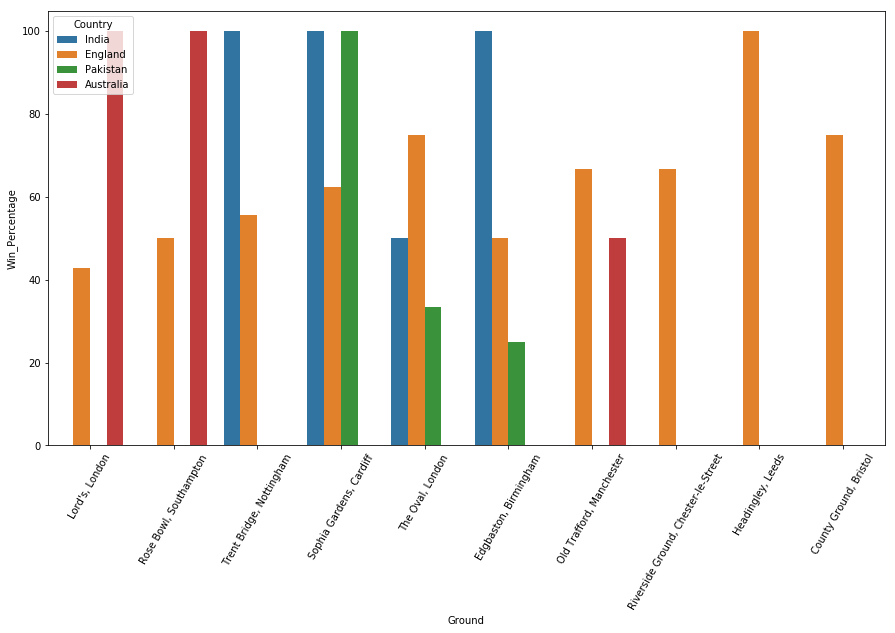

In [30]:
Pitch_Team_Winnings
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["India","England","Pakistan","Australia"])
plt.xticks(rotation = 60)

As we can see,
1. Some Nations have Winning Percentage of 0 in few Stadiums(Either they might not play or never won)
2. England, India has winning percentage of 100 in few Stadiums.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

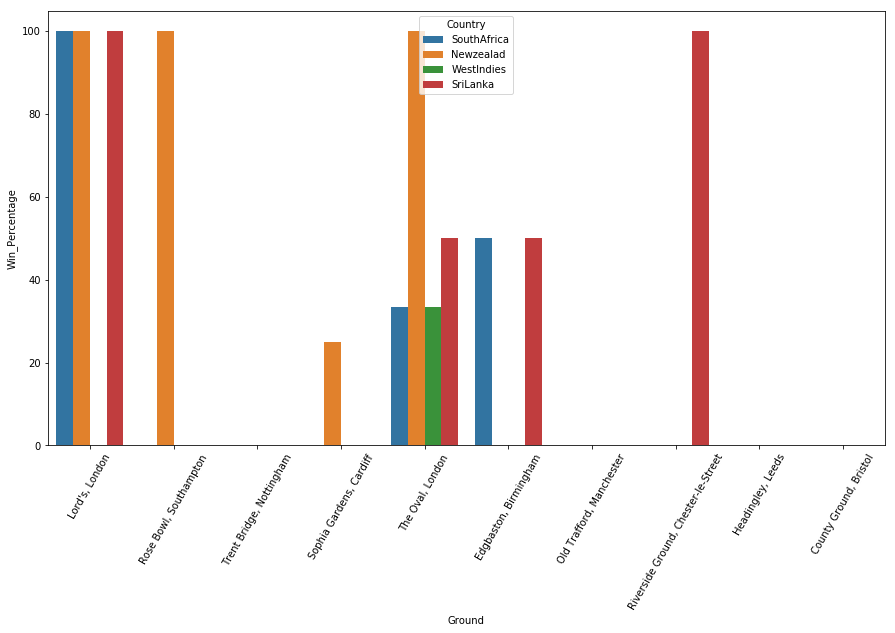

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["SouthAfrica","Newzealad","WestIndies","SriLanka"])
plt.xticks(rotation = 60)

<b><h1><center> Best Batsman who gonna perform well in WC 2019 </center></h1></b>

<center> Let's start analyzing the Batsmen and find solutions to few questions such as<br>
    1. Batsmen with Average above 40<br>
    2. Batsmen with Best Strike Rate<br>
    3. Batsmen with Highest No.Of Fours, Sixers
 </center>

In [32]:
Batsman_Data.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5290,5291,81,81,80,101.25,5,2,v Australia,Canberra,6 Dec 2016,ODI # 3812,Kane Williamson,277906
4823,4824,138,138,139,99.28,11,5,v Sri Lanka,Mount Maunganui,3 Jan 2019,ODI # 4074,Martin Guptill,226492
8942,8943,0,0,3,0.00,0,0,v England,Chattogram,5 Mar 2010,ODI # 2968,Tamim Iqbal,56194
9996,9997,1,1,6,16.66,0,0,v England,Adelaide,26 Jan 2011,ODI # 3089,Shaun Marsh,6683
7767,7768,1,1,2,50.00,0,0,v Australia,Brisbane,19 Jan 2018,ODI # 3958,Moeen Ali,8917


In [33]:
#Removing DNB, and Fetching the Details of Batsmen stats only in England
Batsman_Data.drop(columns=Batsman_Data.columns[0],inplace=True)
Batsman_Data = Batsman_Data[~Batsman_Data.Bat1.isin(["DNB","TDNB"])]
Batsman_Data = Batsman_Data[Batsman_Data.Player_ID.isin(WC_Players_Data.ID)]
stadiums = [item[0] for item in set(WC_Ground_Stats)]
Batsman_Data_in_England = Batsman_Data[Batsman_Data.Ground.isin(stadiums)]

In [34]:
#Calculating Averages
def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1
Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)

In [35]:
change_type = ["Runs","BF","4s","6s"]
for i in change_type:
    Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
Batsman_Data_in_England.head()
Batsman_Data_Information = Batsman_Data_in_England
Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()

In [36]:
Batsman_Data_in_England["Average"] = Batsman_Data_in_England["Runs"]/Batsman_Data_in_England.Out_or_NotOut

In [37]:
Batsman_Data_in_England.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
369,Nottingham,Ravindra Jadeja,12,9,1,0,234675,0,inf
167,Chester-le-Street,Adil Rashid,12,9,2,0,244497,0,inf
389,Southampton,Chris Morris,35,22,3,2,439952,0,inf


In [38]:
Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
29,Glenn Maxwell,359,319,35,11,3250260,9,39.888889
57,Kusal Perera,220,286,24,1,3908203,11,20.000000
88,Shaheen Afridi,7,4,0,1,1072470,1,7.000000
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
99,Tom Curran,31,30,5,0,550235,1,31.000000


In [39]:
Best_Batsman_Average = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 40 )]\
.sort_values(by = "Average",ascending = False)
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [40]:
Player_WC_ID = Batsman_Data[["Player_ID","Batsman"]].drop_duplicates()

In [41]:
#Best Batsman with Average above 40
Player_ID = list(Best_Batsman_Average.merge(Player_WC_ID,how = "left",on = "Batsman")["Player_ID_y"].astype("int"))
Best_Batsman_Average["Player_ID"] = Player_ID
WC_Players_Data.columns = ["Player", "Player_ID","Country"]
Country_Player = list(Best_Batsman_Average.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Best_Batsman_Average["Country"] = Country_Player
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India
52,Kane Williamson,815,849,84,7,277906,13,62.692308,NewZealand
82,Rohit Sharma,687,829,72,13,34102,12,57.250000,India
33,Hashim Amla,851,941,94,5,43906,15,56.733333,SouthAfrica


In [42]:
Best_Batsman_Average["Strike_Rate"] = Best_Batsman_Average["Runs"]/Best_Batsman_Average["BF"]*100
Best_Batsman_Average.head(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan,92.629482


Top 5 Batsmen based on Average,
1. Imam-ul-Haq
2. Evin Lewis
3. Jason Holder
4. Ravindra Jadeja
5. Sarfaraz Ahmed

Average is good for the above since they have played very few matches and performed well in those matches.

In [43]:
Best_Batsman_Average.sort_values(["Strike_Rate"],ascending = False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
25,Evin Lewis,200,152,18,9,431901,2,100.0000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.0000,WestIndies,125.619835
47,Jos Buttler,1654,1358,147,47,308967,32,51.6875,England,121.796760
28,Fakhar Zaman,452,394,50,11,512191,8,56.5000,Pakistan,114.720812
34,Imad Wasim,224,200,22,5,227758,5,44.8000,Pakistan,112.000000


Top 5 Batsmen based on Strike Rate,
1. Evin Lewis
2. Jason Holder
3. Jos Buttler
4. Fakhar Zaman
5. Imad Wasim

Jos Buttler has good Strike Rate and Good Average.

The above Players are the Best Players in the WC2019. 

In [44]:
Best_Batsman_Average["Average_4s_per_wicket"] = Best_Batsman_Average["4s"]/Best_Batsman_Average["Out_or_NotOut"]
Best_Batsman_Average["Average_6s_per_wicket"] = Best_Batsman_Average["6s"]/Best_Batsman_Average["Out_or_NotOut"]

In [45]:
Best_Batsman_Average.sort_values(by = ["Average_4s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384,12.000000,0.500000
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.000000,4.500000
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India,101.035197,7.866667,0.866667
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England,111.119691,7.545455,1.045455
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729,7.250000,1.250000


Top 5 Batsmen with most 4s per innings
1. Imam-ul-Haq
2. Evin Lewis
3. Shikhar Dhawan
4. Jonny Bairstow
5. Ravindra Jadeja

In [46]:
Best_Batsman_Average.sort_values(by = ["Average_6s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.00000,4.50000
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835,5.00000,3.50000
18,David Miller,289,294,15,12,321777,6,48.166667,SouthAfrica,98.299320,2.50000,2.00000
47,Jos Buttler,1654,1358,147,47,308967,32,51.687500,England,121.796760,4.59375,1.46875
91,Shaun Marsh,372,374,28,11,6683,8,46.500000,Australia,99.465241,3.50000,1.37500


Top 5 Batsmen with most 6s per innings
1. Evin Lewis
2. Jason Holder
3. David Miller
4. Jos Buttler
5. Shaun Marsh

<b><h1><center>Which Countries have highest no.of Best Batsman ? </center></h1></b>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

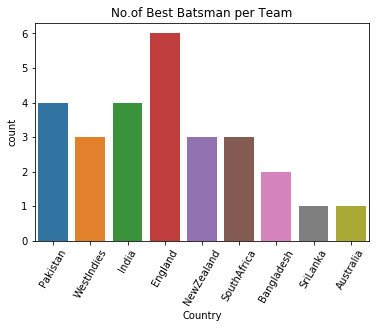

In [47]:
sns.countplot(Best_Batsman_Average["Country"]).set_title("No.of Best Batsman per Team")
plt.xticks(rotation = 60)

Seems like there gonna be a tough fight among England, India, Pakistan

Who are they?

In [48]:
Best_Batsman_Average[["Country","Batsman"]].sort_values("Country")

,Country,Batsman
91,Australia,Shaun Marsh
62,Bangladesh,Mahmudullah
96,Bangladesh,Tamim Iqbal
47,England,Jos Buttler
46,England,Jonny Bairstow
45,England,Joe Root
24,England,Eoin Morgan
10,England,Ben Stokes
40,England,Jason Roy
92,India,Shikhar Dhawan


(* *Editing Bowl Stats* )

In [49]:
Bowler_Data.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [50]:
Bowler_Data = Bowler_Data[Bowler_Data.Ground.isin(stadiums)]
Bowler_Data = Bowler_Data[~Bowler_Data.Overs.str.contains('-')]
Bowler_Data.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5512,5513,8.0,0,43,2,5.37,21.50,24.0,v Pakistan,Birmingham,4 Jun 2017,ODI # 3878,Ravindra Jadeja,234675
8,9,10.0,0,62,2,6.20,31.00,30.0,v England,Lord's,3 Jul 2011,ODI # 3168,Suranga Lakmal,49619
4904,4905,10.0,1,53,2,5.30,26.50,30.0,v England,The Oval,12 Jun 2015,ODI # 3655,Trent Boult,277912
2499,2500,4.0,0,11,1,2.75,11.00,24.0,v England,Nottingham,5 Sep 2012,ODI # 3304,JP Duminy,44932
10154,10155,8.0,1,55,0,6.87,-,-,v England,Birmingham,10 Jun 2017,ODI # 3885,Pat Cummins,489889


From the above csv, What does Econ, Ave, SR stand for?

1. Econ : 
    Economy of Bowler means, how many runs does the Bowler concede in one Over?
2. Ave :
    Average for a Bowler means, how many runs conceded by Bowler per wicket.
3. SR :
    Strike Rate refers to no.of balls bowled for gaining the wicket.
4. Mdns :
    Maiden Over refers that the Bowler didn't concede any run.


In [51]:
def overs_to_ball(value):
    if "." in value:
        over = value.split(".")
        return int(over[0]) * 6 + int(over[1])
    else:
        return int(value) * 6

In [52]:
Bowler_Data["Balls"] = Bowler_Data.Overs.apply(overs_to_ball)
for i in ["Runs","Mdns","Wkts","Balls"]:
    Bowler_Data[i] = Bowler_Data[i].astype("float")
Bowler_Data.Ground = Bowler_Data.Ground.apply(Full_Ground_names)
Bowlers_Data_in_England = Bowler_Data.groupby(["Bowler"]).sum()[["Runs","Mdns","Wkts","Balls"]].reset_index()

In [53]:
Bowlers_Data_in_England["Economy"] = Bowlers_Data_in_England.Runs * 6 /Bowlers_Data_in_England.Balls
Bowlers_Data_in_England["Average"] = Bowlers_Data_in_England.Runs/ Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England["Strike_Rate"] = Bowlers_Data_in_England.Balls / Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.25000
13,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.40000
54,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.21875
34,Joe Root,689.0,0.0,9.0,684.0,6.043860,76.555556,76.00000
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.00000


Since we are concentrating mainly on Best Bowlers and Full time Bowlers, Let's remove the Bowlers Data Who have bowled a total of less than 10 overs in England Pitches and taken at least one wicket.

In [54]:
Bowlers_Data_in_England = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 36) & (Bowlers_Data_in_England.Wkts > 0)]
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
1,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
7,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333
8,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000
9,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333
10,Chris Morris,343.0,3.0,8.0,378.0,5.444444,42.875000,47.250000
11,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909


In [55]:
Player_WC_ID = Bowler_Data[["Player_ID","Bowler"]].drop_duplicates()

Bowlers_Data_in_England = Bowlers_Data_in_England.merge(Player_WC_ID,how = "left",on = "Bowler")

Country_Player = list(Bowlers_Data_in_England.merge(WC_Players_Data,how = "left",on = "Player_ID")["Country"])
Bowlers_Data_in_England["Country"] = Country_Player
Bowlers_Data_in_England.iloc[57,-1] = "SriLanka"
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England
2,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,SouthAfrica
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka
4,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,WestIndies
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,England
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies
8,Chris Morris,343.0,3.0,8.0,378.0,5.444444,42.875000,47.250000,439952,SouthAfrica
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England


**Highest Number of Maiden Overs**

In [56]:
Bowlers_Data_in_England.sort_values(by = ["Mdns"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica


Here, If we observe Bhuvneshwar Kumar, 
His maiden Overs are less, but he bowled few overs compared to others. So we should consider no.of maidens per total Overs. Then, it's correct way to judge.

In [57]:
Bowlers_Data_in_England["Maidens_per_Overs_Percentage"] = \
((Bowlers_Data_in_England.Mdns*6)/(Bowlers_Data_in_England.Balls))*100
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.25,49764,SriLanka,1.960784
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.00,272279,Australia,0.000000
14,Glenn Maxwell,262.0,0.0,6.0,288.0,5.458333,43.666667,48.00,325026,Australia,0.000000
24,Joe Root,689.0,0.0,9.0,684.0,6.043860,76.555556,76.00,303669,England,0.000000
37,Matt Henry,251.0,0.0,5.0,210.0,7.171429,50.200000,42.00,506612,NewZealand,0.000000


In [58]:
Bowlers_Data_in_England.sort_values(by = ["Maidens_per_Overs_Percentage"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica,9.615385
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia,8.108108
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh,5.940594
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
25,Junaid Khan,399.0,4.0,11.0,429.0,5.580420,36.272727,39.000000,259551,Pakistan,5.594406


**Top 10 Best Bowlers based on Average**

In [59]:
Bowlers_Data_in_England.sort_values(by = ["Average"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India,0.000000
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh,0.000000
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand,2.272727
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India,3.521127
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
56,Steve Smith,191.0,0.0,7.0,228.0,5.026316,27.285714,32.571429,267192,Australia,0.000000


**Top 10 Best Bowlers based on Economy**

In [60]:
Bowlers_Data_in_England.sort_values(by = ["Economy"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,Australia,0.000000
55,Shoaib Malik,376.0,3.0,11.0,504.0,4.476190,34.181818,45.818182,42657,Pakistan,3.571429
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
63,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,India,0.000000
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
41,Mohammad Hafeez,540.0,1.0,10.0,711.0,4.556962,54.000000,71.100000,41434,Pakistan,0.843882
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies,2.120141
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308


**Top 10 Best Bowlers based on Strike Rate**

In [61]:
Bowlers_Data_in_England.sort_values(by = ["Strike_Rate"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh,0.000000
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England,3.333333
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand,2.272727
42,Mohammad Hasnain,80.0,0.0,2.0,60.0,8.000000,40.000000,30.000000,1158100,Pakistan,0.000000


**Top 10 Highest Wicket Takers**

In [62]:
Bowlers_Data_in_England.sort_values(by = ["Wkts"],ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
33,Liam Plunkett,2033.0,3.0,68.0,2071.0,5.889908,29.897059,30.455882,19264,England,0.869145
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England,1.866833
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,England,0.504626
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England,4.441155
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India,3.521127
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363


It's obvious that, England played many matches, so that's why, they are leading in taking Wickets.

<b><h1><center>Which Countries have Best Bowlers ? </center></h1></b>

In [63]:
aggregations = {
    'Runs':'sum',
    'Mdns':'sum',
    'Wkts':'sum',
    'Balls':'sum',
    'Economy': 'mean',
    'Average':'mean',
    'Strike_Rate':'mean',
    'Maidens_per_Overs_Percentage':'mean'
}
Bowlers_Data_in_England_TeamWise = Bowlers_Data_in_England.groupby('Country').agg(aggregations).reset_index()
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

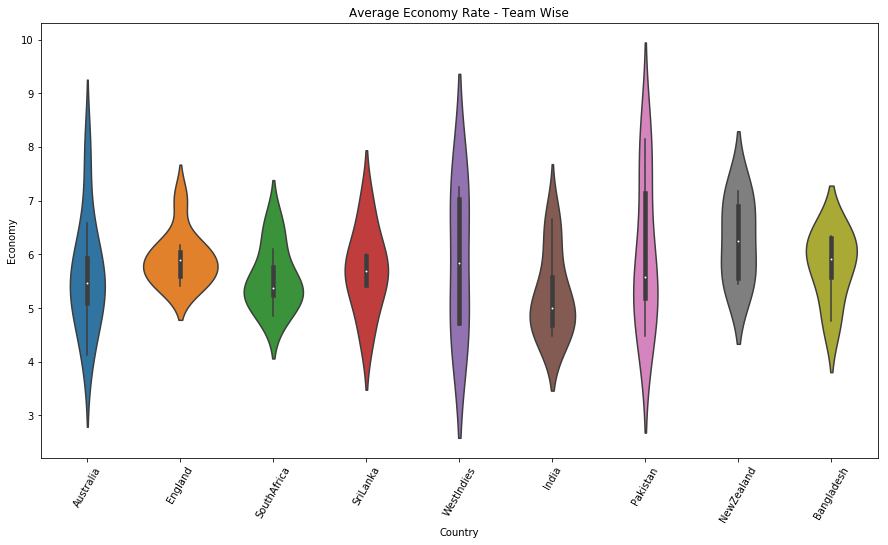

In [64]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Economy", data = Bowlers_Data_in_England).set_title("Average Economy Rate - Team Wise")
plt.xticks(rotation = 60)

As you see,
1. Batsmen can target High Economy Rate Teams like, Bangladesh, New Zealand, West Indies
2. India, South Africa, Australia have good Economy Rates

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

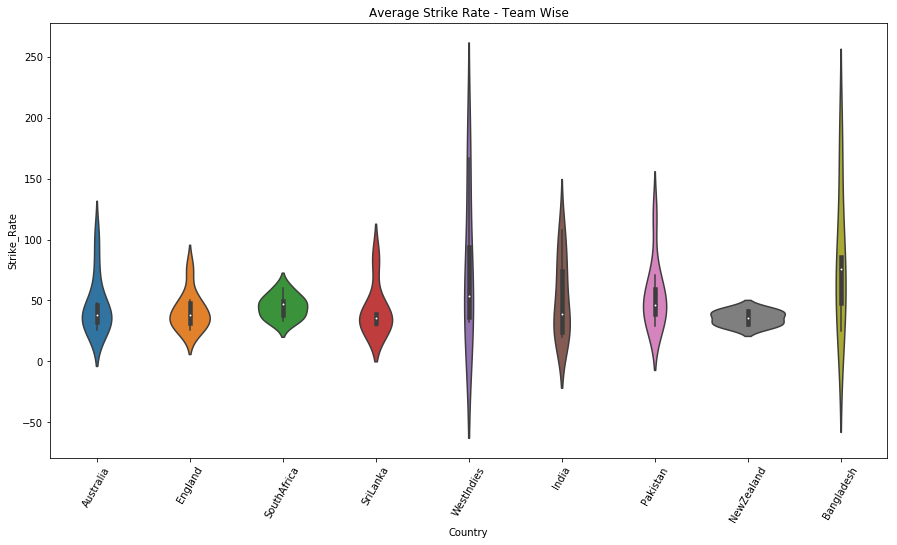

In [65]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Strike_Rate", data = Bowlers_Data_in_England).set_title("Average Strike Rate - Team Wise")
plt.xticks(rotation = 60)

On an Average, it seems like all Nations take around 40-60 Balls for taking a Wicket.
1. New Zealand has good consistency Strike Rate. But in previous graph we can observe that, they are giving more runs. That point should be noted.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

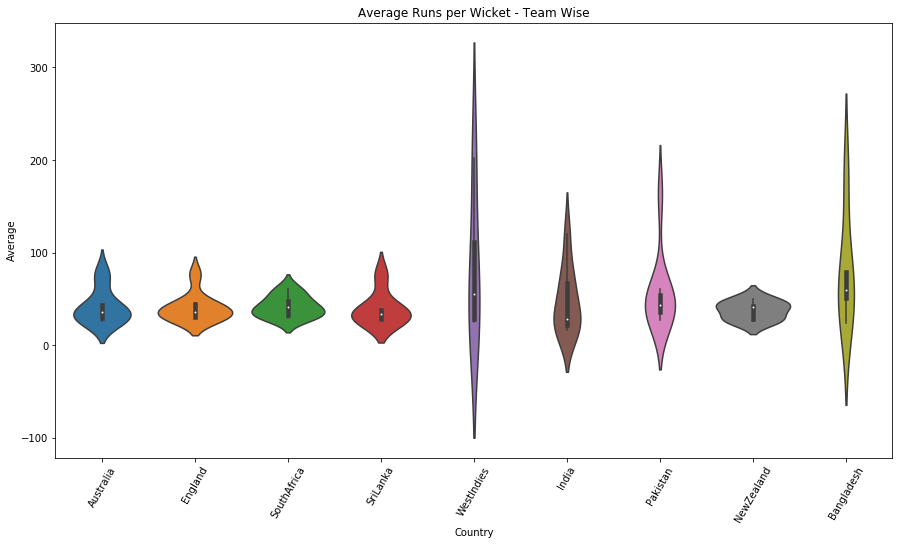

In [66]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Average", data = Bowlers_Data_in_England).set_title("Average Runs per Wicket - Team Wise")
plt.xticks(rotation = 60)

We can observe that,
1. Teams are targeting Bangladesh.
2. No consistency in West Indies, India, Pakistan.
3. Even New Zealand is giving more runs per wicket.
4. Australia, England, South Africa are consistent in giving runs per wicket.
5. On an Average, India has less Average Rate.

In [67]:
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text xticklabel objects>)

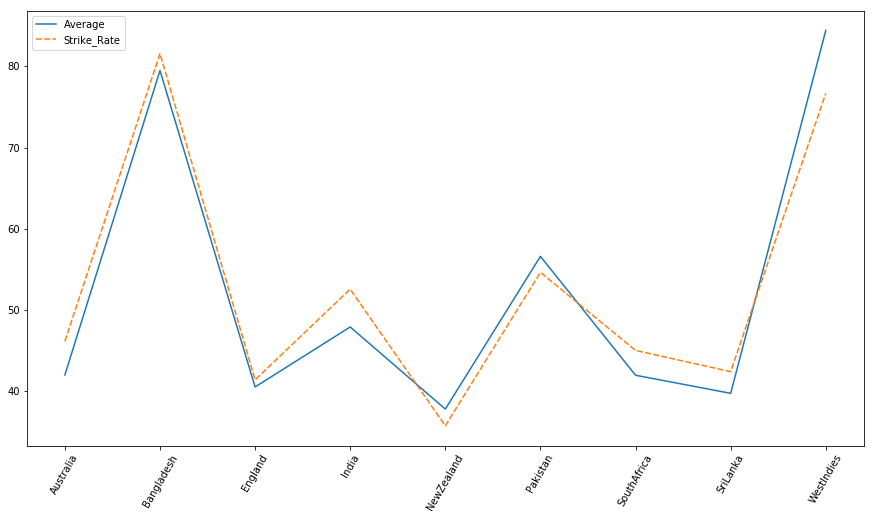

In [68]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[Bowlers_Data_in_England_TeamWise.columns[6:8]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text xticklabel objects>)

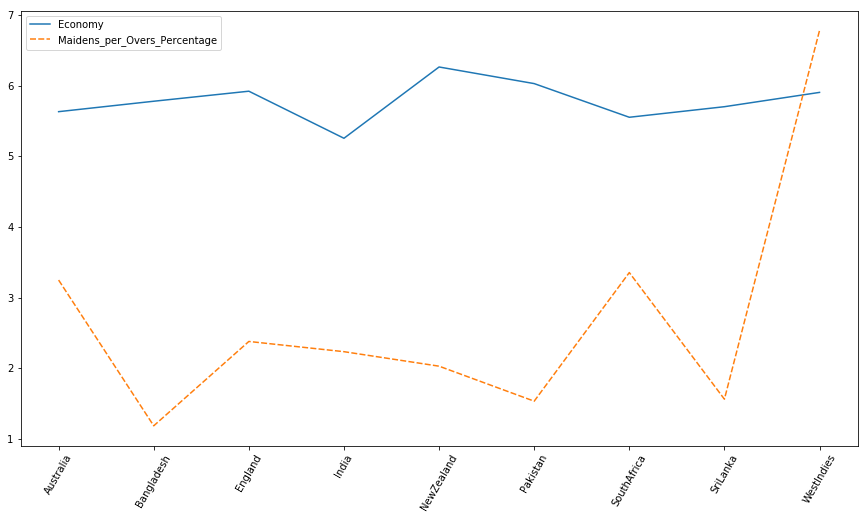

In [69]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[["Economy","Maidens_per_Overs_Percentage"]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)


Insights
1. When Playing against India, it's difficult to score high runs, even thoug India may not take wickets but they will restrict opponents to a less score.
2. South Africa seems to be the Best Team in terms of Bowling.
3. Teams can score more while playing against Bangladesh and West Indies.

So now, let's see Which Country has Best Bowlers in their Team.
Best Bowlers : Qualifying Criteria,
1. Minimum no.of Overs Bowled : 25
2. Average Less than 40
3. Strike Rate Less than 40
4. Economy Rate Less than 7.5

In [70]:
Best_Bowlers_Data = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)
                        
                       ]
Best_Bowlers_Data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies,2.120141
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
10,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,SouthAfrica,4.945055
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
18,Imran Tahir,148.0,0.0,5.0,165.0,5.381818,29.600000,33.000000,40618,SouthAfrica,0.000000
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

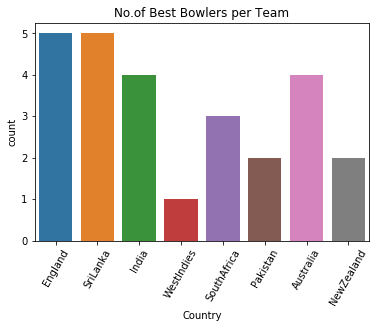

In [71]:
sns.countplot(Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)].Country).\
set_title("No.of Best Bowlers per Team")
plt.xticks(rotation = 60)

1. England seems to be best in both, Batting and Bowling Department.
2. India seems to be tough Oppostion for England.

<h2><center> Best All Rounders</center></h2>

In [72]:
Bowler_Data = Bowler_Data[Bowler_Data.columns[1:]]
Bowler_Data.columns = ['Overs', 'Maidens', 'Runs_Given', 'Wickets', 'Economy', 'Bowling_Average', 'Bowling_StrikeRate', 'Opposition',\
                       'Ground', 'Start_Date', 'Match_ID', 'Player', 'Player_ID', 'Balls_Bowled']
Bowler_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled
6905,8.1,0.0,38.0,2.0,4.65,19.00,24.5,v Ireland,"Lord's, London",7 May 2017,ODI # 3865,Mark Wood,351588,49.0
7090,4.0,0.0,28.0,0.0,7.00,-,-,v New Zealand,"Edgbaston, Birmingham",9 Jun 2015,ODI # 3654,Ben Stokes,311158,24.0
5485,10.0,0.0,38.0,1.0,3.80,38.00,60.0,v England,"Trent Bridge, Nottingham",30 Aug 2014,ODI # 3520,Ravindra Jadeja,234675,60.0
1364,6.0,0.0,25.0,0.0,4.16,-,-,v India,"Sophia Gardens, Cardiff",20 Jun 2013,ODI # 3376,Thisara Perera,233514,36.0
6902,10.0,0.0,75.0,1.0,7.50,75.00,60.0,v Pakistan,"Trent Bridge, Nottingham",30 Aug 2016,ODI # 3773,Mark Wood,351588,60.0


In [73]:
Batsman_Data_Information.sample(5)
Batsman_Data_Information.Ground = Batsman_Data_Information.Ground.apply(Full_Ground_names)
Batsman_Data_Information = Batsman_Data_Information[["Runs","BF","SR","4s","6s","Match_ID",\
                                                     "Player_ID","Out_or_NotOut"]]
Batsman_Data_Information.columns = ["Runs_Scored","Balls_Faced","Batting_StrikeRate","4s","6s",\
                                    "Match_ID","Player_ID","Out_or_NotOut"]
                                    
Batsman_Data_Information.sample(5)

,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Match_ID,Player_ID,Out_or_NotOut
5828,1,12,8.33,0,0,ODI # 2167,30045,1
8603,21,25,84.00,2,0,ODI # 3891,56025,1
8030,15,19,78.94,2,0,ODI # 3375,24598,0
7470,3,3,100.00,0,0,ODI # 2385,19264,1
8113,87,81,107.40,8,5,ODI # 3885,24598,1


In [74]:
All_Rounders_Data = Bowler_Data.merge(Batsman_Data_Information,on = ["Match_ID","Player_ID"])
# All_Rounders_Data[["Player","Player_ID","Match_ID","Start_Date","Ground","Opposition","Runs_Scored","Balls_Faced",\
#                   "Batting_StrikeRate","4s","6s","Out_or_NotOut","Overs","Maidens","Runs_Given","Wickets","Economy",\
#                   "Bowling_Average","Bowling_StrikeRate"]]
All_Rounders_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Out_or_NotOut
105,10.0,1.0,81.0,1.0,8.10,81.00,60.0,v England,"Rose Bowl, Southampton",11 May 2019,ODI # 4133,Hasan Ali,681305,60.0,4,4,100.00,0,0,0
126,5.0,0.0,28.0,0.0,5.60,-,-,v England,"Riverside Ground, Chester-le-Street",10 Sep 2010,ODI # 3043,Mohammad Hafeez,41434,30.0,30,42,71.42,4,0,1
343,5.0,0.0,46.0,0.0,9.20,-,-,v Sri Lanka,"Headingley, Leeds",1 Jul 2006,ODI # 2389,Liam Plunkett,19264,30.0,9,6,150.00,0,0,0
182,9.0,1.0,45.0,3.0,5.00,15.00,18.0,v Bangladesh,"Sophia Gardens, Cardiff",9 Jun 2017,ODI # 3883,Tim Southee,232364,54.0,10,5,200.00,2,0,0
46,6.0,0.0,25.0,0.0,4.16,-,-,v India,"Sophia Gardens, Cardiff",20 Jun 2013,ODI # 3376,Thisara Perera,233514,36.0,0,4,0.00,0,0,1


Now we have the Data of player who bowled and batted in the same Match.
So, According to me, All Rounder should Possess following conditions
1. Should have Good Batting Average and Bowling Average.
2. Also, All Rounder Should have Good Economy while Bowling and Good Strike Rate while Batting.

In [75]:
All_Rounders_Data = All_Rounders_Data.groupby(["Player_ID","Player"]).sum().reset_index()
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut
39,303669,Joe Root,0.0,664.0,9.0,654.0,1026,1194,90,3,27
12,49758,Lasith Malinga,8.0,592.0,17.0,641.0,70,76,6,2,8
25,234675,Ravindra Jadeja,1.0,460.0,13.0,456.0,281,258,29,5,4
31,267192,Steve Smith,0.0,191.0,7.0,228.0,115,115,11,0,4
17,56143,Shakib Al Hasan,0.0,318.0,4.0,342.0,166,204,16,1,6


In [76]:
#Bowling Stats
All_Rounders_Data["Economy"] = All_Rounders_Data.Runs_Given*6/All_Rounders_Data.Balls_Bowled
All_Rounders_Data["Bowling_StrikeRate"] = All_Rounders_Data.Runs_Given/All_Rounders_Data.Wickets
All_Rounders_Data["Bowling_Average"] = All_Rounders_Data.Balls_Bowled/All_Rounders_Data.Wickets
#Batting Stats
All_Rounders_Data["Batting_Average"] = All_Rounders_Data.Runs_Scored/All_Rounders_Data.Out_or_NotOut
All_Rounders_Data["Batting_StrikeRate"] = All_Rounders_Data.Runs_Scored*100/All_Rounders_Data.Balls_Faced
All_Rounders_Data.sample(5)




,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
10,47492,Dale Steyn,1.0,250.0,5.0,256.0,18,31,1,0,2,5.859375,50.000000,51.200000,9.000000,58.064516
6,41434,Mohammad Hafeez,1.0,540.0,10.0,711.0,527,719,55,11,16,4.556962,54.000000,71.100000,32.937500,73.296245
1,8917,Moeen Ali,4.0,1083.0,28.0,1157.0,609,523,51,25,18,5.616249,38.678571,41.321429,33.833333,116.443595
17,56143,Shakib Al Hasan,0.0,318.0,4.0,342.0,166,204,16,1,6,5.578947,79.500000,85.500000,27.666667,81.372549
62,506612,Matt Henry,0.0,110.0,1.0,90.0,12,12,1,1,2,7.333333,110.000000,90.000000,6.000000,100.000000


In [77]:
All_Rounders_Data[(All_Rounders_Data.Balls_Bowled > 120)&\
                 #(All_Rounders_Data.Bowling_Average < 60)&\
                 (All_Rounders_Data.Economy < 7)&\
                 #(All_Rounders_Data.Bowling_StrikeRate > 35)&\
                 (All_Rounders_Data.Batting_StrikeRate > 70)&\
                 (All_Rounders_Data.Batting_Average > 35)]

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
13,49764,Angelo Mathews,1.0,204.0,8.0,270.0,465,559,38,5,8,4.533333,25.500000,33.750000,58.125000,83.184258
20,227758,Imad Wasim,1.0,429.0,7.0,460.0,224,200,22,5,5,5.595652,61.285714,65.714286,44.800000,112.000000
25,234675,Ravindra Jadeja,1.0,460.0,13.0,456.0,281,258,29,5,4,6.052632,35.384615,35.076923,70.250000,108.914729
35,277906,Kane Williamson,0.0,256.0,6.0,246.0,440,458,43,3,8,6.243902,42.666667,41.000000,55.000000,96.069869
39,303669,Joe Root,0.0,664.0,9.0,654.0,1026,1194,90,3,27,6.091743,73.777778,72.666667,38.000000,85.929648
41,311158,Ben Stokes,1.0,1097.0,28.0,1057.0,1048,1095,88,30,23,6.227058,39.178571,37.750000,45.565217,95.707763
47,325026,Glenn Maxwell,0.0,253.0,6.0,282.0,299,263,30,9,8,5.382979,42.166667,47.000000,37.375000,113.688213
54,391485,Jason Holder,0.0,151.0,2.0,132.0,152,121,10,7,2,6.863636,75.500000,66.000000,76.000000,125.619835
69,625371,Hardik Pandya,1.0,256.0,4.0,243.0,147,97,7,10,4,6.320988,64.000000,60.750000,36.750000,151.546392


Please Upvote if you like my analysis. Also, Give suggestions and insights that you find